In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [92]:
game_sales = pd.read_csv('video_games_sales.csv')


In [93]:
game_sales.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [94]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [95]:
game_sales.shape

(16598, 11)

In [96]:
game_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [97]:
game_sales["Year"] = game_sales["Year"].astype(object)
game_sales = game_sales.rename(columns={'NA_Sales': 'NA_Sales(Millions)','EU_Sales': 'EU_Sales(Millions)','JP_Sales': 'JP_Sales(Millions)',
                                        'Other_Sales': 'Other_Sales(Millions)','Global_Sales': 'Global_Sales(Millions)'})

game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    16598 non-null  int64  
 1   Name                    16598 non-null  object 
 2   Platform                16598 non-null  object 
 3   Year                    16327 non-null  object 
 4   Genre                   16598 non-null  object 
 5   Publisher               16540 non-null  object 
 6   NA_Sales(Millions)      16598 non-null  float64
 7   EU_Sales(Millions)      16598 non-null  float64
 8   JP_Sales(Millions)      16598 non-null  float64
 9   Other_Sales(Millions)   16598 non-null  float64
 10  Global_Sales(Millions)  16598 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [98]:
game_sales.isnull().sum()





Rank                        0
Name                        0
Platform                    0
Year                      271
Genre                       0
Publisher                  58
NA_Sales(Millions)          0
EU_Sales(Millions)          0
JP_Sales(Millions)          0
Other_Sales(Millions)       0
Global_Sales(Millions)      0
dtype: int64

In [99]:
game_sales[game_sales['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales(Millions),EU_Sales(Millions),JP_Sales(Millions),Other_Sales(Millions),Global_Sales(Millions)
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [100]:
game_sales.fillna({"Year": 0}, inplace=True)
game_sales[game_sales['Year'].isnull()]

C:\Users\Mike\AppData\Local\Temp\ipykernel_16072\2755100584.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  game_sales.fillna({"Year": 0}, inplace=True)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales(Millions),EU_Sales(Millions),JP_Sales(Millions),Other_Sales(Millions),Global_Sales(Millions)


In [101]:
game_sales.duplicated().sum()


np.int64(0)

In [102]:
game_sales['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [103]:
game_sales["Platform"].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [104]:

avg_games_dev = game_sales.groupby('Platform')['NA_Sales(Millions)'].mean().sort_values(ascending=False)

In [105]:
avg_games_dev

Platform
NES     1.285102
GB      1.166531
GEN     0.713704
2600    0.681203
X360    0.475138
N64     0.435799
XOne    0.390563
Wii     0.383177
PS3     0.295154
PS4     0.288095
PS      0.281363
PS2     0.270171
WiiU    0.267972
SNES    0.256192
GC      0.240036
GBA     0.228151
XB      0.226566
DS      0.180633
SCD     0.166667
3DS     0.154951
DC      0.104423
PC      0.097167
PSP     0.089852
PSV     0.039225
SAT     0.004162
GG      0.000000
3DO     0.000000
PCFX    0.000000
NG      0.000000
WS      0.000000
TG16    0.000000
Name: NA_Sales(Millions), dtype: float64

In [106]:
game_sales[game_sales["Platform"]=="3DO"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales(Millions),EU_Sales(Millions),JP_Sales(Millions),Other_Sales(Millions),Global_Sales(Millions)
12635,12637,Policenauts,3DO,1995.0,Adventure,Konami Digital Entertainment,0.0,0.0,0.06,0.0,0.06
14996,14999,Bust-A-Move,3DO,1994.0,Puzzle,Micro Cabin,0.0,0.0,0.02,0.0,0.02
15479,15482,Sotsugyou II: Neo Generation Special,3DO,1995.0,Simulation,Imageworks,0.0,0.0,0.02,0.0,0.02


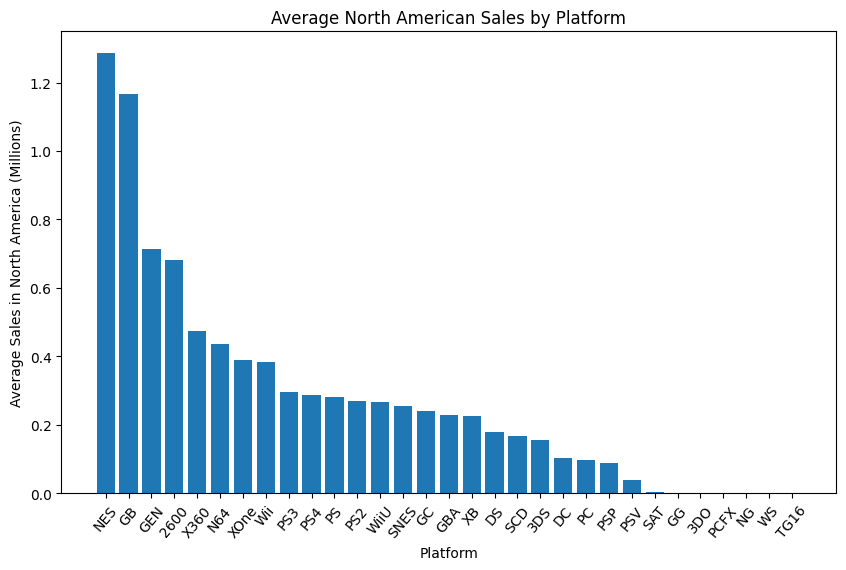

In [107]:
plt.figure(figsize=(10,6))
plt.bar(avg_games_dev.index, avg_games_dev.values)

plt.xlabel("Platform")
plt.ylabel("Average Sales in North America (Millions)")
plt.title("Average North American Sales by Platform")
plt.xticks(rotation=50)

plt.show()

In [108]:
yearly_sales = game_sales.groupby("Year")["EU_Sales(Millions)"].sum()
yearly_sales

Year
0.0        25.01
1980.0      0.67
1981.0      1.96
1982.0      1.65
1983.0      0.80
1984.0      2.10
1985.0      4.74
1986.0      2.84
1987.0      1.41
1988.0      6.59
1989.0      8.44
1990.0      7.63
1991.0      3.95
1992.0     11.71
1993.0      4.65
1994.0     14.88
1995.0     14.90
1996.0     47.26
1997.0     48.32
1998.0     66.90
1999.0     62.67
2000.0     52.75
2001.0     94.89
2002.0    109.74
2003.0    103.81
2004.0    107.32
2005.0    121.94
2006.0    129.24
2007.0    160.50
2008.0    184.40
2009.0    191.59
2010.0    176.73
2011.0    167.44
2012.0    118.78
2013.0    125.80
2014.0    125.65
2015.0     97.71
2016.0     26.76
2017.0      0.00
2020.0      0.00
Name: EU_Sales(Millions), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

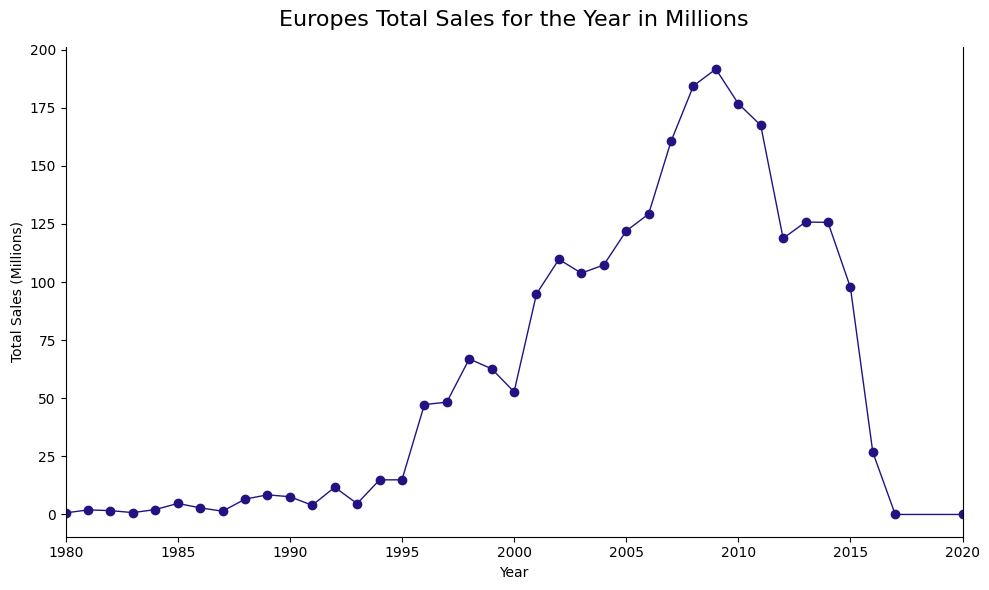

In [115]:
plt.figure(figsize=(10,6))
plt.plot(
    yearly_sales.index,
    yearly_sales.values,
    marker='o',
    color = "#261183",
    linewidth =1)

plt.xlabel("Year")
plt.ylabel("Total Sales (Millions)")
plt.title("Europes Total Sales for the Year in Millions", fontsize =16, pad=15)
plt.xlim(1980,2020)

ax=plt.gca()
ax.spines['top'].set_visible(False)


plt.tight_layout()
plt.show

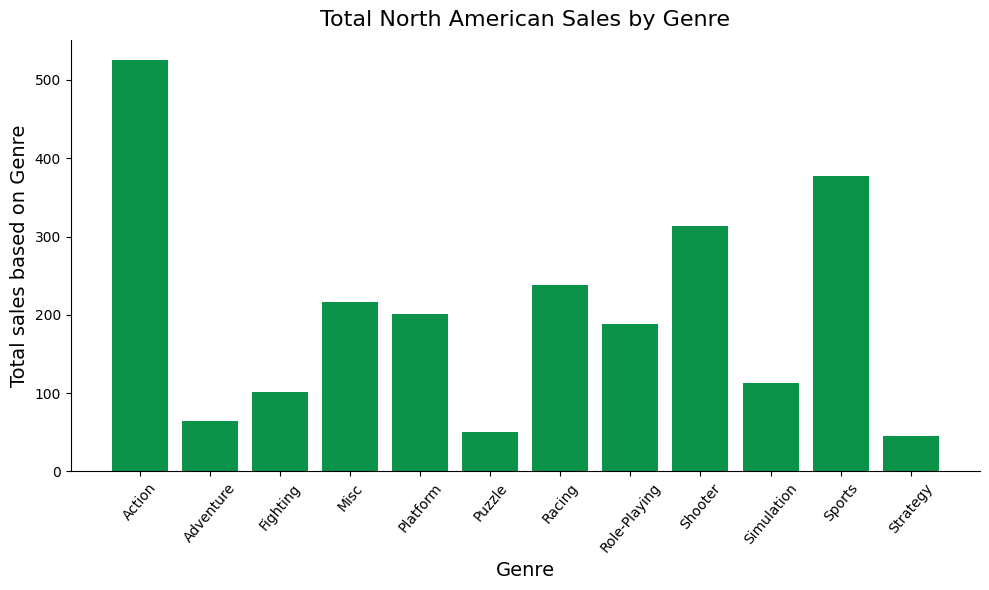

In [124]:
genre_sales= game_sales.groupby("Genre")["EU_Sales(Millions)"].sum()


plt.figure(figsize=(10,6))
plt.bar(genre_sales.index, genre_sales.values,color="#0B9449")

plt.xlabel("Genre",fontsize= 14)
plt.ylabel("Total sales based on Genre",fontsize=14)
plt.title("Total North American Sales by Genre",fontsize =16, pad=10)
plt.xticks(rotation=50)

plt.tight_layout()
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


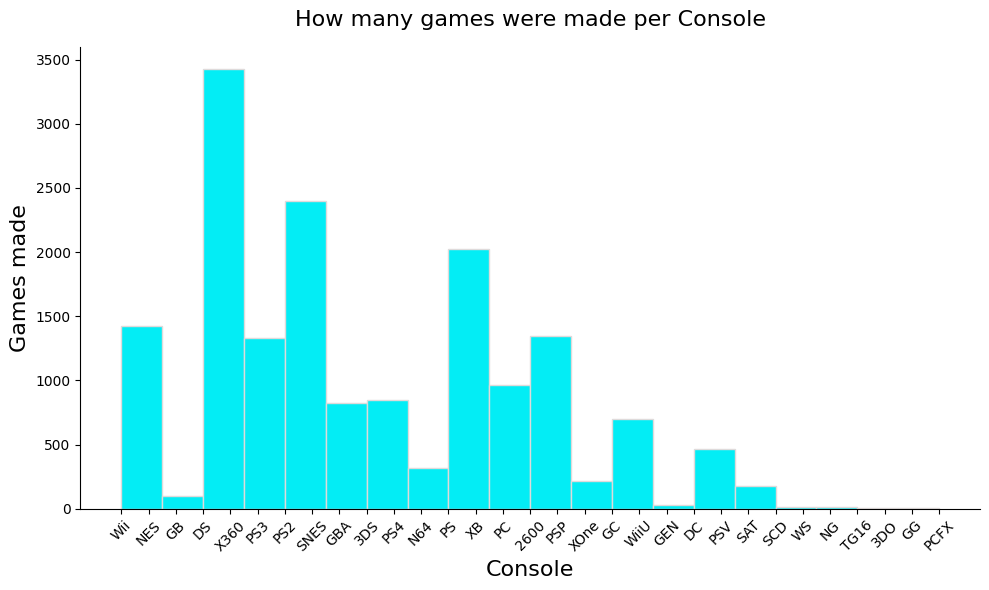

In [126]:
plt.figure(figsize=(10,6))


plt.hist(
    game_sales["Platform"],
    bins=20,
    color = "#03edf5",
    edgecolor= "#dfdada"
)

plt.xlabel("Console",fontsize=16)
plt.ylabel("Games made",fontsize=16)
plt.title("How many games were made per Console",fontsize=16, pad=15)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

